# Lab | Cleaning numerical data

1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [7]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
customer_df.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [9]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [10]:
customer_df[customer_df['effective_to_date'].isnull()]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [11]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [12]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [13]:
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [14]:
numerical_df = customer_df.select_dtypes(np.number)

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [15]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [16]:
def disc_cont (df, threshold):
    numerical_disc = []
    numerical_cont = []
    for col in df.columns:
        num_uniq_values = df[col].nunique()
        if num_uniq_values < threshold:
            numerical_disc.append(col)
        else:
            numerical_cont.append(col)
    numerical_disc = df[numerical_disc]
    numerical_cont = df[numerical_cont]
    return numerical_disc, numerical_cont

In [17]:
numerical_df_disc, numerical_df_cont = disc_cont(numerical_df, threshold=101)

In [18]:
numerical_df_disc

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [19]:
numerical_df_cont

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


8. Plot a correlation matrix, comment what you see.

In [20]:
corr_matrix = numerical_df_cont.corr()

<Axes: >

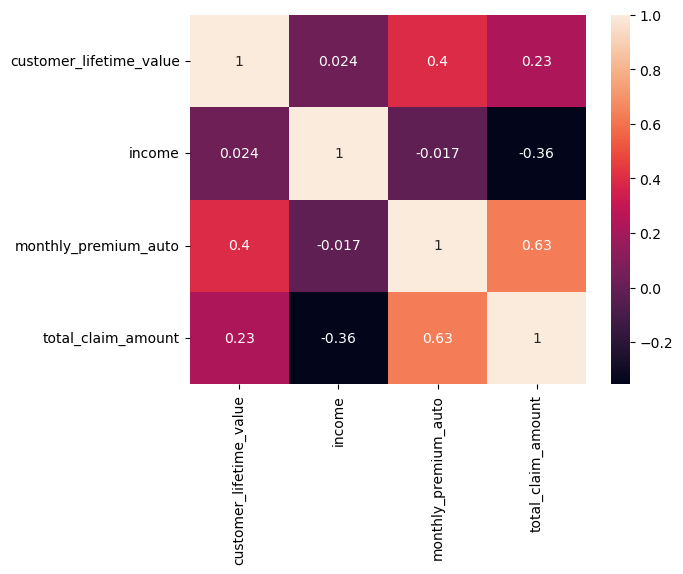

In [21]:
sns.heatmap(corr_matrix, annot=True)

None of the correlations between the features are extremely high.

There's correlation between customer lifetime value and monthly premium auto. Also between monthly premium auto and total claim amount. This makes sense.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



We could be using countplot for discrete variables. But in general I think displot helps us effectively for this goal, for both discrete and continuous variables.

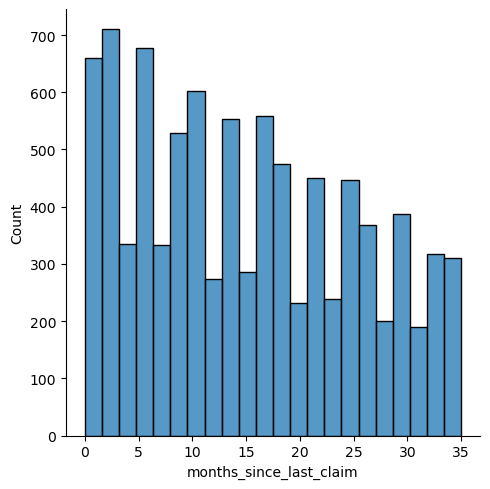

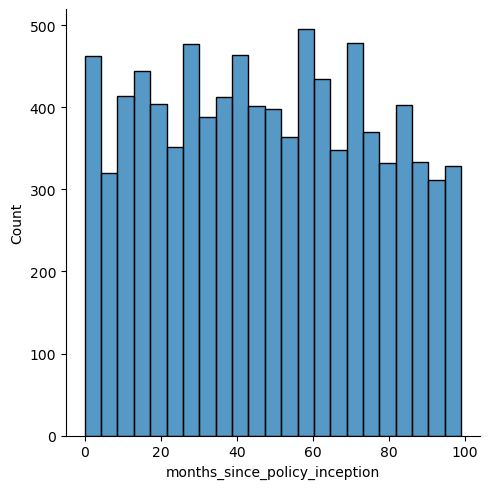

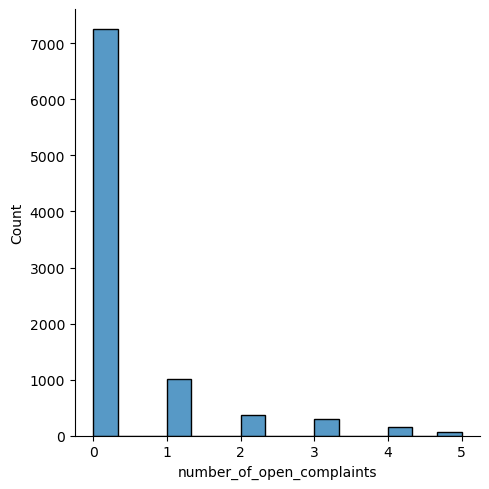

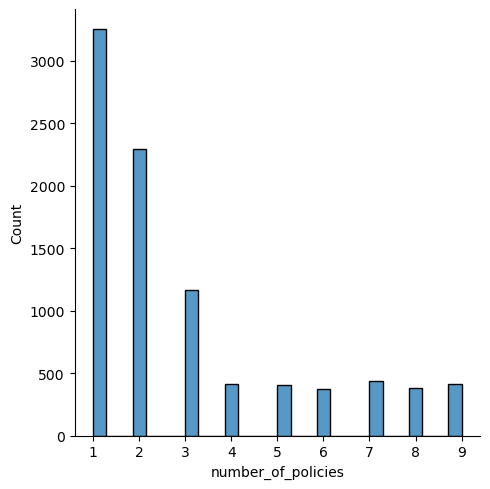

In [22]:
def plot_displots_for_columns(df):
    for col in df.columns:
        sns.displot(x=df[col])
        plt.show()

plot_displots_for_columns(numerical_df_disc)

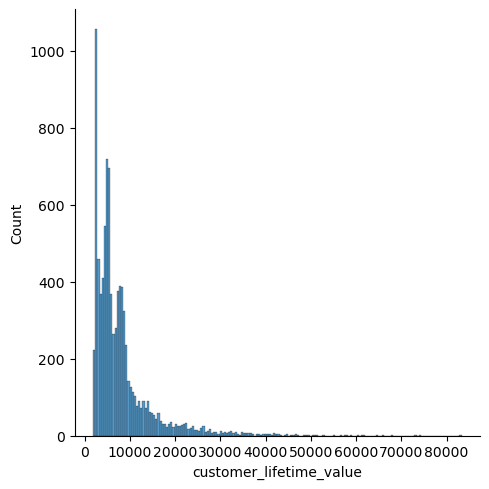

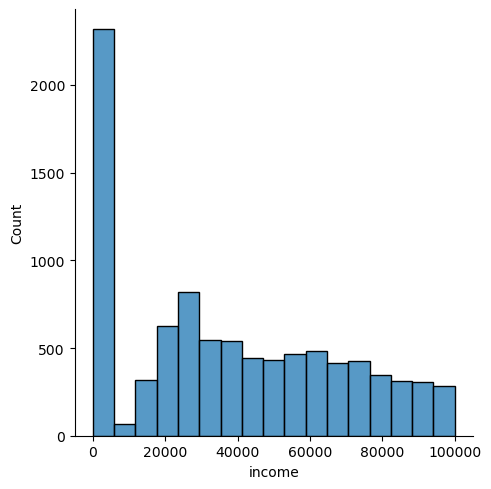

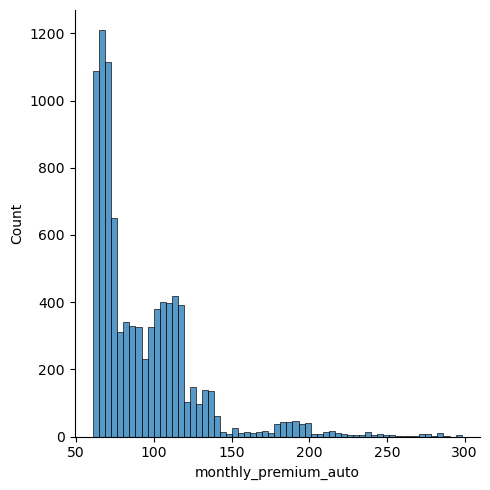

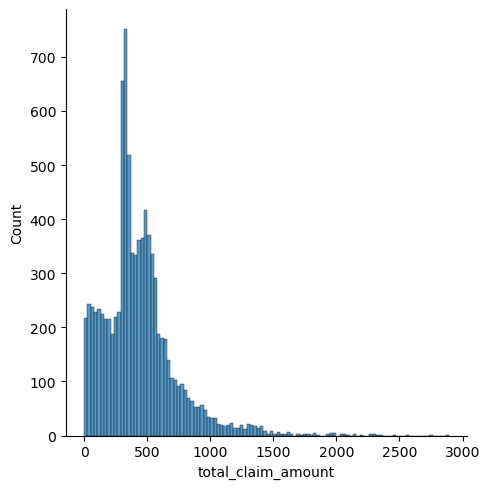

In [23]:
plot_displots_for_columns(numerical_df_cont)

10. Comment what you can see in the plots.

- Most of the features present data that is somewhat balanced through the x axis.

- Some of the features present distributions that are more skewed, but not heavily skewed.

- We can also spot some extreme values in some of the distributions. We can take a look at them later.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

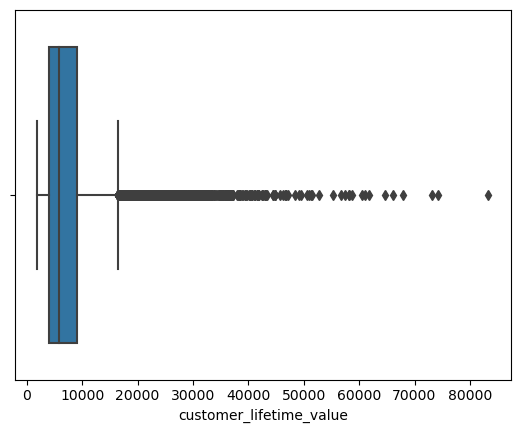

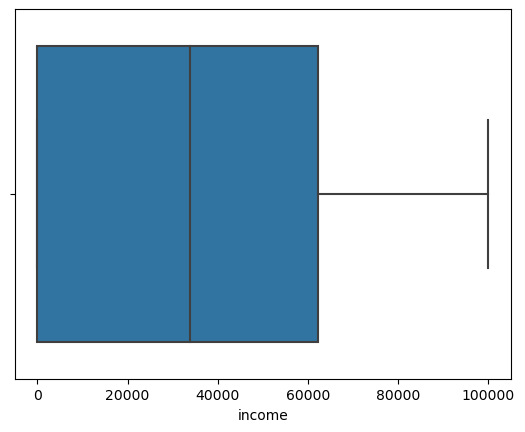

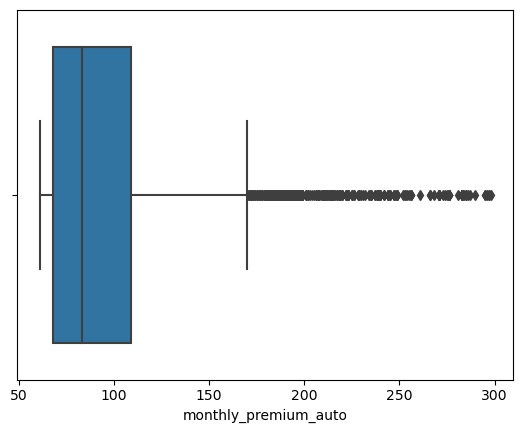

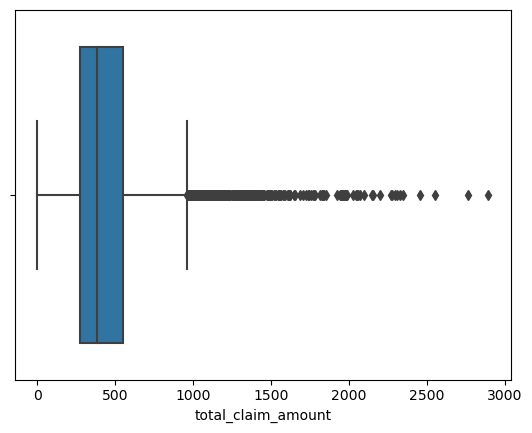

In [24]:
for col in numerical_df_cont.columns:
    sns.boxplot(x=numerical_df_cont[col])
    plt.show()

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

- We can see some extreme values in customer lifetime value. We decide not to drop them as we think they could contain potentially valuable information.

- Part of the monthly premium auto values are also outside of the quantiles. This feature also contains valuable information so we decide not to exlude them for the moment.

- Total claim amount contains also some extreme values. We decide to keep these values of our target at least fot the first iteration of the model.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [25]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [26]:
numerical_df.to_csv("numerical.csv")

# Lab | Cleaning categorical data.

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find all of the categorical data. Save it in a categorical_df variable.

In [27]:
categorical_df = customer_df.select_dtypes(exclude=np.number)

In [28]:
categorical_df.shape

(9134, 16)

3. Check for NaN values and decide what to do with them, do it now.

In [29]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

4. Check all unique values of columns.

In [30]:
for col in categorical_df.columns:
    unique_values = categorical_df[col].unique()
    print(f"'{col}' unique values: {unique_values}")

'customer' unique values: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
'state' unique values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
'response' unique values: ['No' 'Yes']
'coverage' unique values: ['Basic' 'Extended' 'Premium']
'education' unique values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
'effective_to_date' unique values: ['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.

5. Check dtypes. Do they all make sense as categorical data?

In [31]:
categorical_df.dtypes

customer                     object
state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employment_status            object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

Yes, in general we think they all make sense as categorical. We would need to remove the customer id, but the rest seem to make sense as categorical.

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

We remove customer column.

In [32]:
categorical_df = categorical_df.drop('customer', axis=1)

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

We might need to deal with policy information and also try to reduce the number of categories of the different features.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

We keep the information about coporate, personal or special policy (c, p, s) and its type (1, 2, 3). This way, we can use one-hot encoder later to produce just 4 columns.

In [33]:
categorical_df['policy_type'] = categorical_df['policy_type'].str[0]

In [34]:
categorical_df['policy'] = categorical_df['policy'].str[-1]

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [36]:
for col in categorical_df.columns:
    if col != 'effective_to_date':
        unique_values = categorical_df[col].unique()
        print(f"'{col}' unique values: {unique_values}")

'state' unique values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
'response' unique values: ['No' 'Yes']
'coverage' unique values: ['Basic' 'Extended' 'Premium']
'education' unique values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
'employment_status' unique values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
'gender' unique values: ['F' 'M']
'location_code' unique values: ['Suburban' 'Rural' 'Urban']
'marital_status' unique values: ['Married' 'Single' 'Divorced']
'policy_type' unique values: ['C' 'P' 'S']
'policy' unique values: ['3' '2' '1']
'renew_offer_type' unique values: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
'sales_channel' unique values: ['Agent' 'Call Center' 'Web' 'Branch']
'vehicle_class' unique values: ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
'vehicle_size' unique values: ['Medsize' 'Small' 'Large']


In [37]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [38]:
categorical_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [39]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [40]:
categorical_df['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [41]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [42]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [43]:
categorical_df['policy'].value_counts()

3    4588
2    2881
1    1665
Name: policy, dtype: int64

In [44]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [45]:
categorical_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [46]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [47]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

Decisions.

Based on the numbers, **we reduce the number of categories for education and vehicle class columns**.

In [48]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master', 'Doctor']), 'Post Grad', categorical_df['education'])

In [49]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Post Grad               1083
Name: education, dtype: int64

In [50]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Luxury Car', 'Luxury SUV']), 'Luxury', categorical_df['vehicle_class'])

In [51]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury            347
Name: vehicle_class, dtype: int64

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [52]:
categorical_df.to_csv("categorical.csv")

# Lab | Feature extraction

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Make any changes you feel are necessary.
5. Plot time variable. Can you extract something from it?
6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

1. Open the categorical dataframe we created before.

In [53]:
categorical_df.head(3)

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,C,3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,P,3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,P,3,Offer1,Agent,Two-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

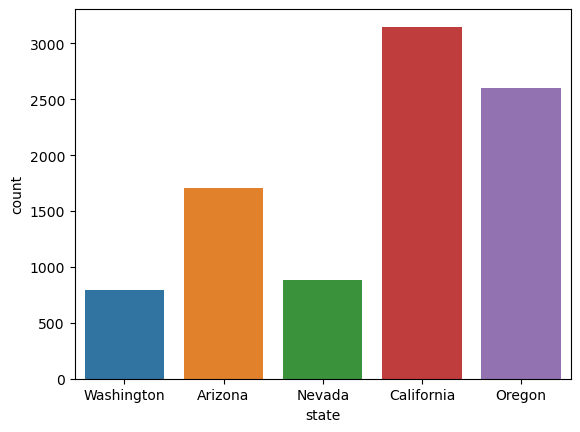

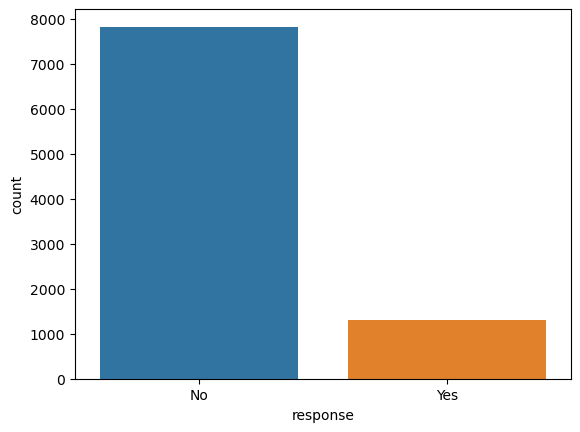

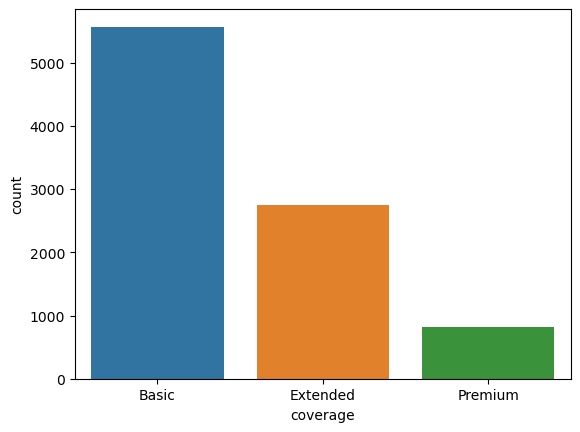

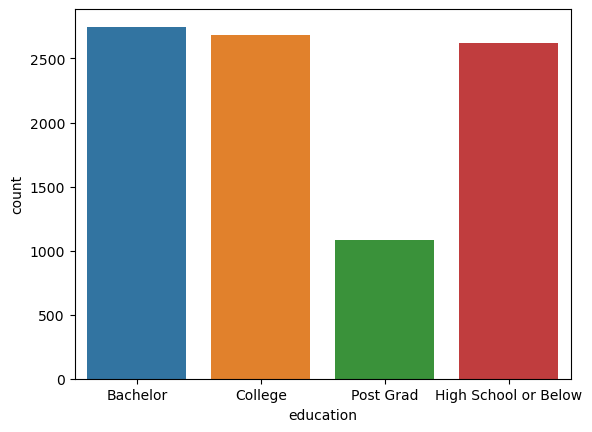

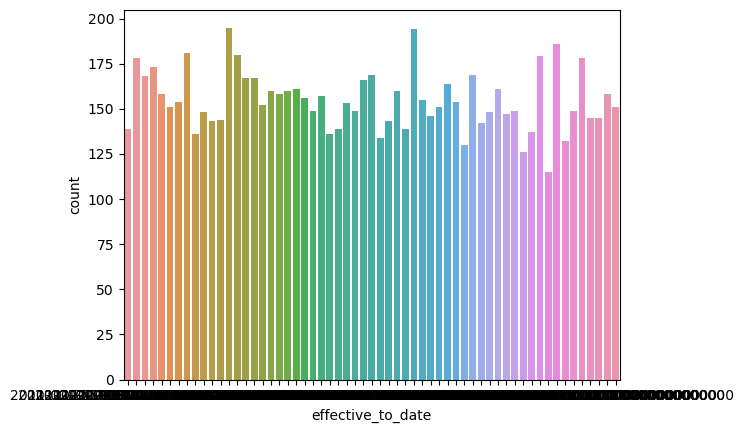

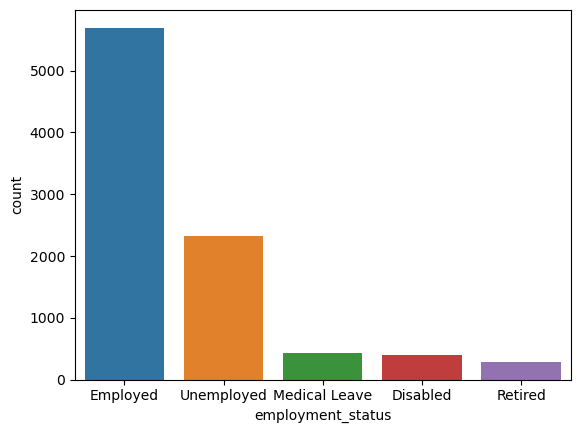

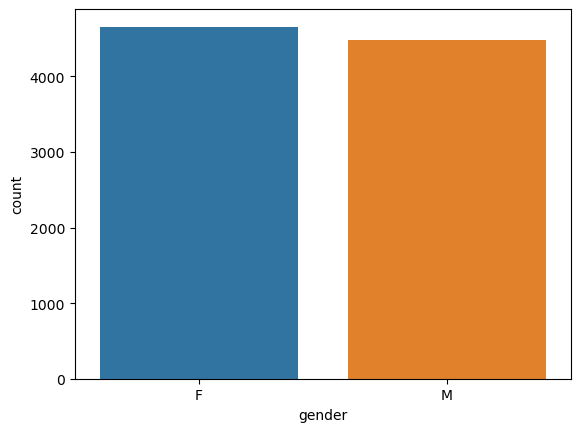

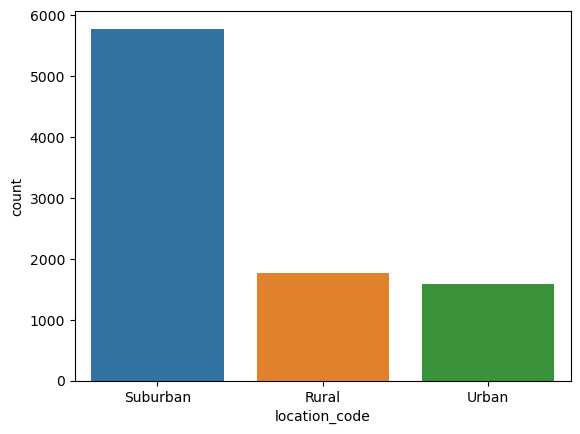

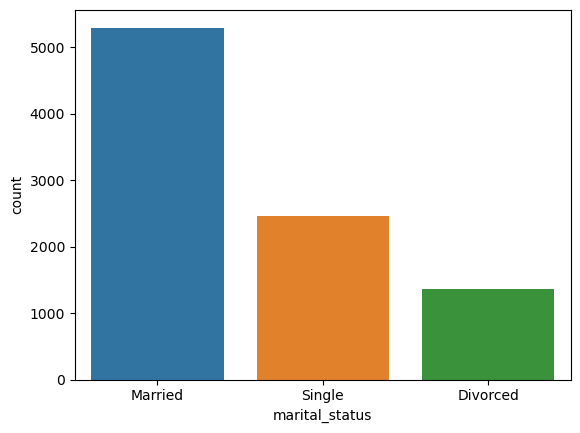

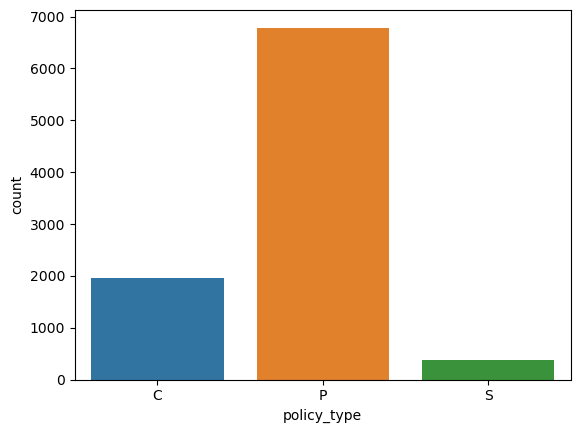

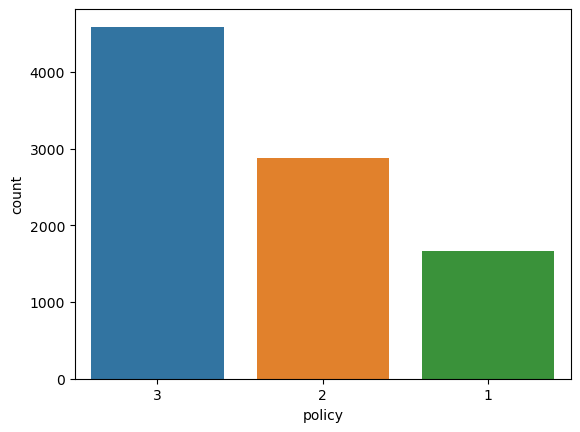

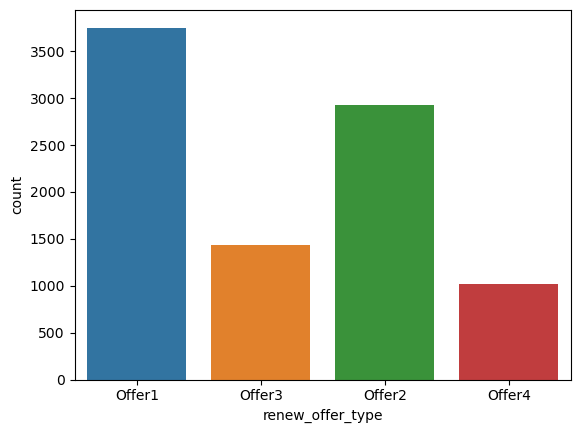

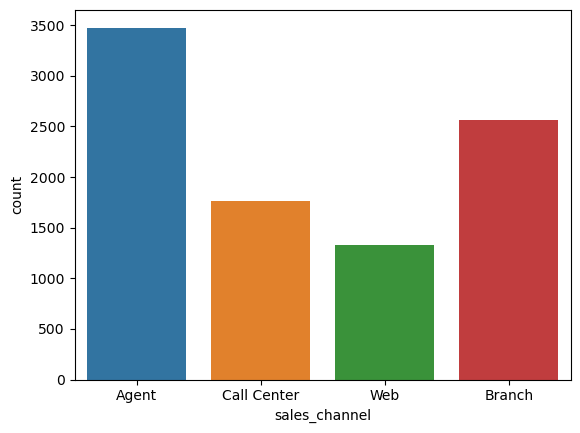

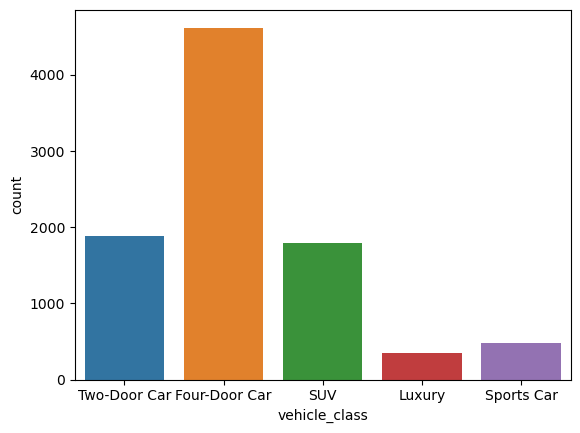

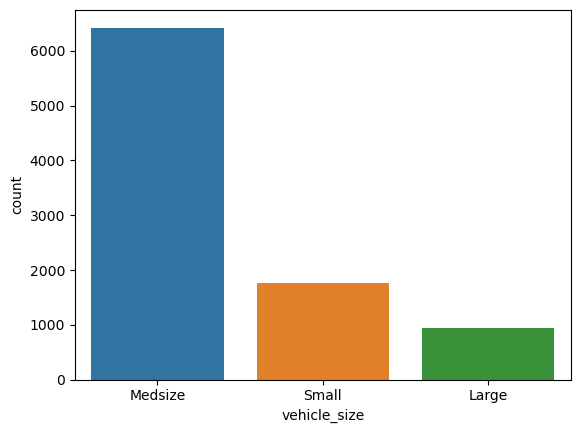

In [54]:
for col in categorical_df.columns:
        sns.countplot(x=categorical_df[col])
        plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

We try to do an overall check of the dependance between the categorical features with the chi2 contingency test. We start with the ones that we think could show some level of dependence.

- Education and employment status.

In [55]:
import scipy.stats as st

education_empl = pd.crosstab(categorical_df['education'], categorical_df['employment_status'], margins = False)
education_empl
st.chi2_contingency(education_empl)[1]

1.3349034793959516e-24

In [56]:
education_empl

employment_status,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,121,1702,126,88,711
College,98,1664,145,102,672
High School or Below,118,1528,115,72,789
Post Grad,68,804,46,20,145


Based on the p-value of the chi2 contingency test, the two variables don't seem to be independent.

- Vehicle class and vehicle size.

In [57]:
veh_class_size = pd.crosstab(categorical_df['vehicle_class'], categorical_df['vehicle_size'], margins = False)
veh_class_size
st.chi2_contingency(veh_class_size)[1]

0.0021302457880856243

Based on the p-value of the chi2 contingency test, the two variables don't seem to be independent.

- Coverage and location code.

In [58]:
cov_loc = pd.crosstab(categorical_df['coverage'], categorical_df['location_code'], margins = False)
cov_loc
st.chi2_contingency(cov_loc)[1]

2.696989413473808e-06

Based on the p-value of the chi2 contingency test, the two variables don't seem to be independent.

4. Make any changes you feel are necessary.


At this point, **We think it's necessary to explore the relationship between the categorical features in more detail before dropping any of them.**

One option could be to build a model with all of the categorical features and then start bulding other models that exclude one of these features that don't seem to be indpendent from one of the other ones. We could then compare the results of the models.

5. Plot time variable. Can you extract something from it?

In [59]:
time_df = {}

6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [60]:
time_df['ed_week_day'] = categorical_df['effective_to_date'].dt.day_name()
time_df['ed_week'] = categorical_df['effective_to_date'].dt.week
time_df['ed_month'] = categorical_df['effective_to_date'].dt.month

C:\Users\dcast\AppData\Local\Temp\ipykernel_9332\2141727302.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  time_df['ed_week'] = categorical_df['effective_to_date'].dt.week


In [61]:
time_df = pd.DataFrame(time_df)

In [62]:
time_df

,ed_week_day,ed_week,ed_month
0,Thursday,8,2
1,Monday,5,1
2,Saturday,7,2
3,Thursday,3,1
4,Thursday,5,2
...,...,...,...
9129,Thursday,6,2
9130,Saturday,6,2
9131,Sunday,5,2
9132,Thursday,5,2


I think it's useful, from a commercial perspective, to just check the days and months in which more policies become effective. 

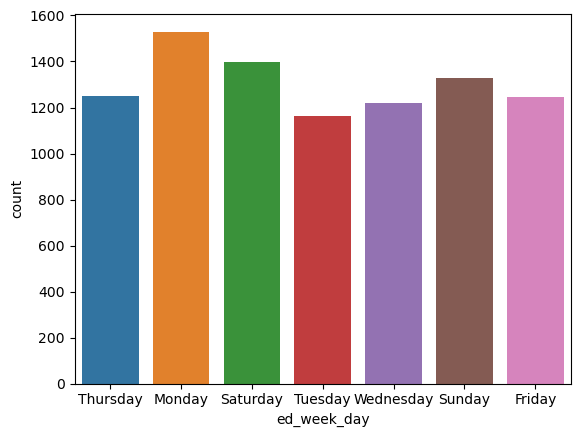

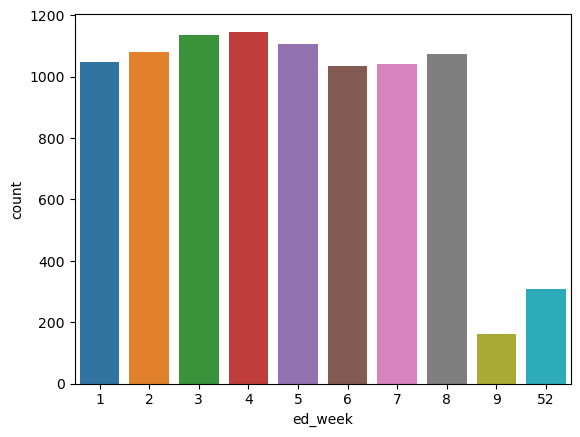

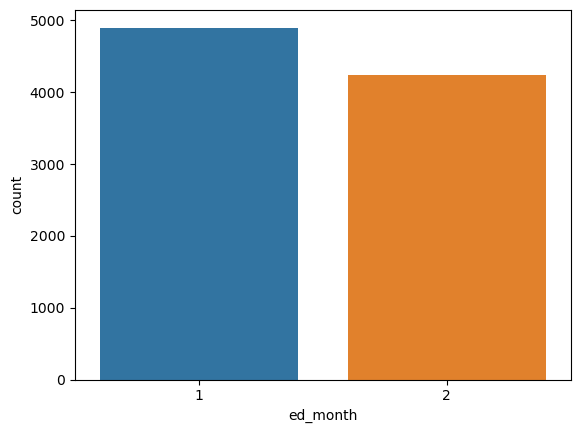

In [63]:
for col in time_df.columns:
        sns.countplot(x=time_df[col])
        plt.show()

In [64]:
time_df[time_df['ed_week']==52].value_counts()

ed_week_day  ed_week  ed_month
Sunday       52       1           160
Saturday     52       1           148
dtype: int64

In [65]:
time_df['ed_week'] = np.where(time_df['ed_week']==52, 0, time_df['ed_week'])

In [66]:
time_df['ed_week'].value_counts()

4    1147
3    1137
5    1105
2    1079
8    1073
1    1049
7    1040
6    1035
0     308
9     161
Name: ed_week, dtype: int64

We can also explore the relationship of this dates with the target.

<Axes: xlabel='ed_week_day', ylabel='total_claim_amount'>

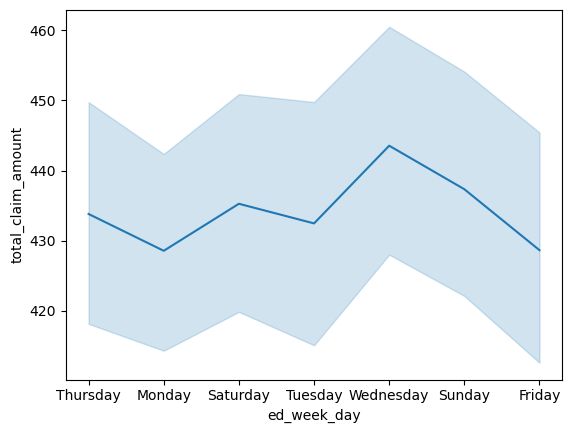

In [67]:
sns.lineplot(x = time_df['ed_week_day'], y=customer_df['total_claim_amount'])

<Axes: xlabel='ed_week', ylabel='total_claim_amount'>

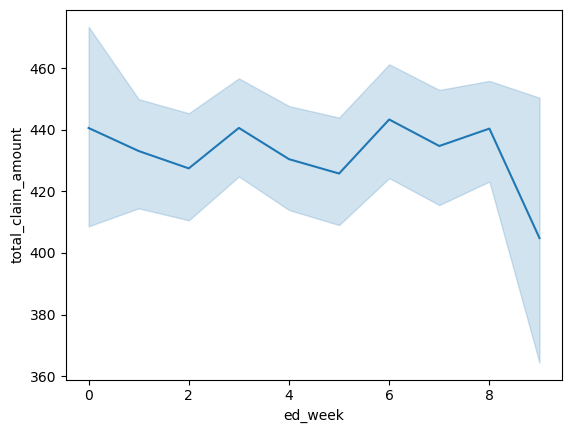

In [68]:
sns.lineplot(x = time_df['ed_week'], y=customer_df['total_claim_amount'])

There doesn't seem to be valuable information in the "effective_to_date" feature. So **at this point, we could consider dropping this column**.